## Customer churn analysis

## Airline Satisfaction dataset

### Importing necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import plotly.express as px
import datetime
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset


In [91]:
df1 = pd.read_csv(r'C:\Users\Adelina Hovakimyan\Downloads\Invistico_Airline.csv')
df1.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


### Main information about the dataset

In [4]:
###function for getting main information about the data
def main_info(data):
    print("Dataset shape is: ", data.shape,"\n")
    print("Dataset columns are: ",data.columns,"\n")
    print("Dataset dimensions are:",data.ndim,"\n")
    print("Dataset information is:\n",data.info(),"\n")
    categorical, numerical = [], []
    for i in data.columns:
        if df1[i].dtype==object:
            categorical.append(i)
        else:
            numerical.append(i)
    print("Categorical datatype columns are: ", [i for i in categorical],"\n")
    print("Numericial datatype columns are: ", [i for i in numerical],"\n")

In [5]:
main_info(df1)

Dataset shape is:  (129880, 23) 

Dataset columns are:  Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object') 

Dataset dimensions are: 2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type   

### Describing the data

In [6]:
df1.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Duplications

In [7]:
sum(df1.duplicated())

0

#### Checking null values

In [8]:
df1.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [9]:
df1.shape

(129880, 23)

In [10]:
df1.dropna(inplace = True)
df1.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [11]:
df1.shape

(129487, 23)

### EDA

Text(0.5, 1.0, 'Distribution of Satisfaction')

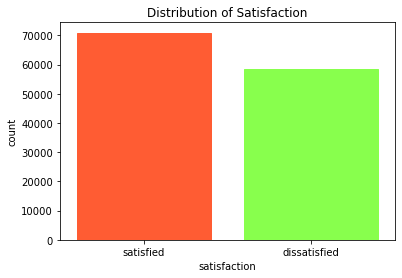

In [12]:
g = sns.countplot(df1['satisfaction'])
colors = ['#ff5c33','#88ff4d']
for i in range(0,2):
    g.patches[i].set_color(colors[i])
plt.title('Distribution of Satisfaction')

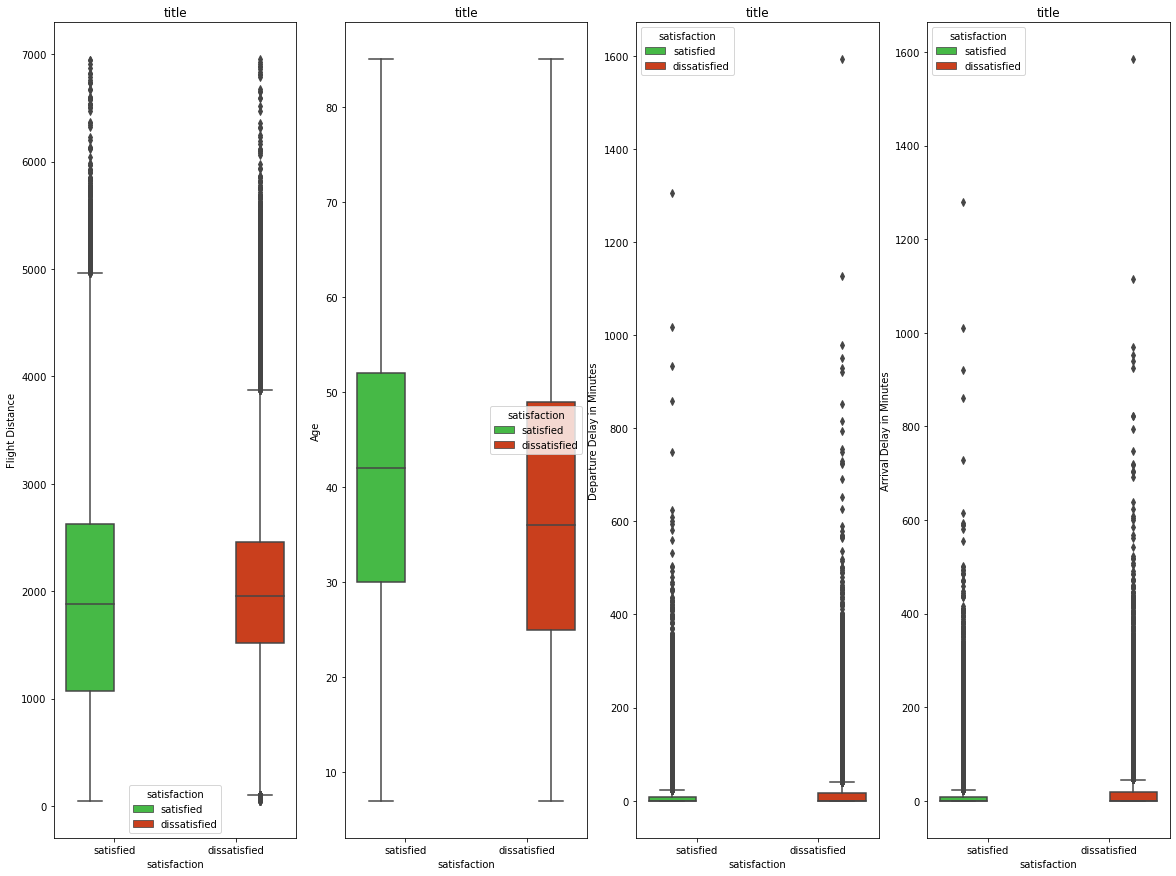

In [13]:
f, axes = plt.subplots(ncols=4, figsize=(20,15))
colors = ["#33cc33", "#e62e00"]

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="satisfaction", y="Flight Distance", data=df1, hue= 'satisfaction',palette=colors, ax=axes[0])
axes[0].set_title('title')

sns.boxplot(x="satisfaction", y="Age", hue= 'satisfaction',data=df1, palette=colors, ax=axes[1])
axes[1].set_title('title')


sns.boxplot(x="satisfaction", y="Departure Delay in Minutes",hue= 'satisfaction', data=df1, palette=colors, ax=axes[2])
axes[2].set_title('title')


sns.boxplot(x="satisfaction", y="Arrival Delay in Minutes", hue= 'satisfaction',data=df1, palette=colors, ax=axes[3])
axes[3].set_title('title')

plt.show()

(array([0, 1]), [Text(0, 0, 'satisfied'), Text(1, 0, 'dissatisfied')])

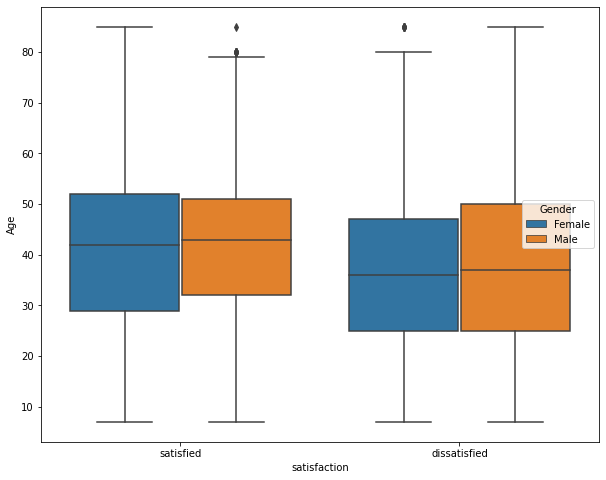

In [14]:
plt.figure(figsize = (10,8))
sns.boxplot(x='satisfaction', y='Age',data =df1,hue = 'Gender')
plt.xticks(size = 10)


(array([0, 1]), [Text(0, 0, 'satisfied'), Text(1, 0, 'dissatisfied')])

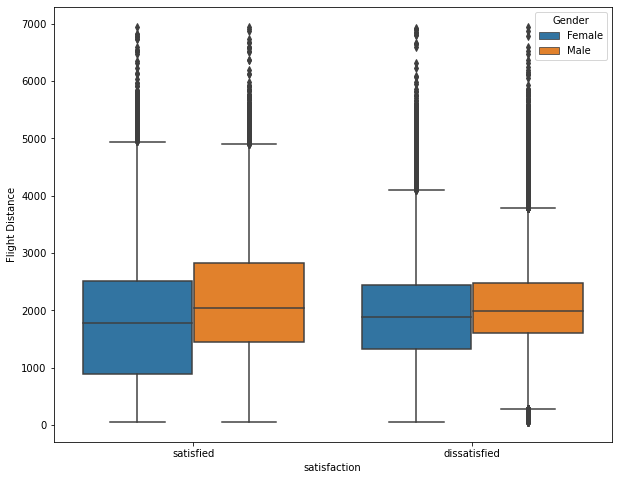

In [15]:
plt.figure(figsize = (10,8))
sns.boxplot(x='satisfaction', y='Flight Distance',data =df1,hue = 'Gender')
plt.xticks(size = 10)

In [16]:
fig = px.scatter(df1, x="Age", y="satisfaction", animation_frame="Flight Distance", 
            color="Gender")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.show()
#animation_frame = df['col'].sort_values() 

NameError: name 'px' is not defined

In [ ]:
#need to do
fig1 = px.box(df1, x="satisfaction", y="Departure Delay in Minutes", color="Customer Type", notched=True)
fig1.show()

In [ ]:
fig2 = px.box(df1, x="satisfaction", y="Departure Delay in Minutes", color="Type of Travel", notched=True)
fig2.show()

In [ ]:
fig3 = px.box(df1, x="satisfaction", y="Departure Delay in Minutes", color="Class", notched=True)
fig3.show()

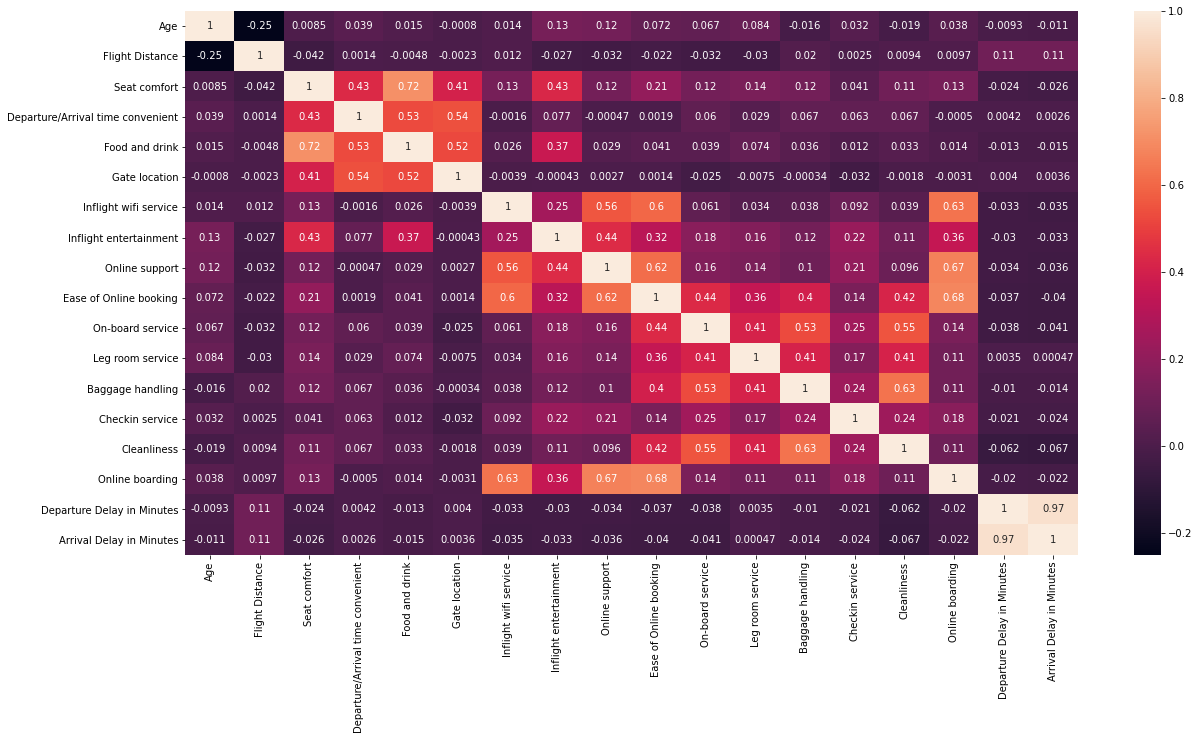

In [17]:
def show_corr(dataframe):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

corr_df = show_corr(df1)

<AxesSubplot:xlabel='Class', ylabel='satisfaction'>

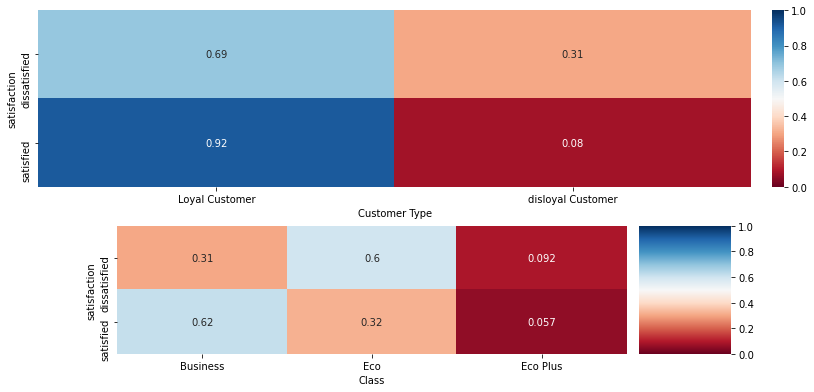

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [18]:
import matplotlib.gridspec as gridspec
fig= plt.figure(figsize = (11,8),constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
plt.figure(figsize = (10, 5))
f1_ax1 = fig.add_subplot(spec[0,:])
cross = pd.crosstab(df1['satisfaction'], df1['Customer Type']).apply(lambda r: r/r.sum(), axis=1)
plt.figure(figsize = (10, 5))
sns.heatmap(cross,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1,
           ax = f1_ax1)
f2_ax2 = fig.add_subplot(spec[1,:])
cross1 = pd.crosstab(df1['satisfaction'], df1['Class']).apply(lambda r: r/r.sum(), axis=1)
plt.figure(figsize = (10, 5))
sns.heatmap(cross1,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1,
           ax = f2_ax2)

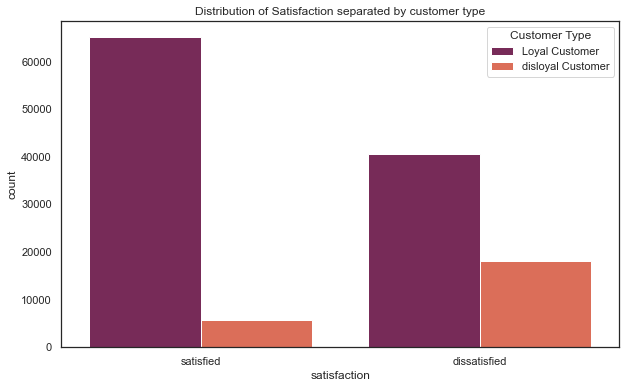

In [35]:
sns.set(style='white')
plt.figure(figsize=(10,6))
g1 = sns.countplot(x='satisfaction',data= df1,
              hue= 'Customer Type',palette = "rocket" )


plt.title('Distribution of Satisfaction separated by customer type')
plt.show()

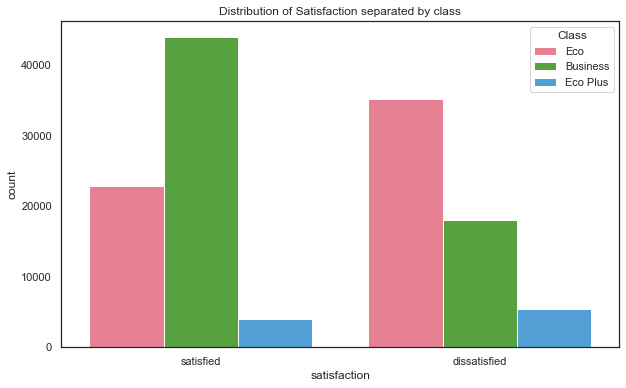

In [33]:
sns.set(style='white')
plt.figure(figsize=(10,6))
#colors = ['#206040','#ff4000','#66ffb3','#ff3300','#ff5c33','#ff9980']
g2 = sns.countplot(x='satisfaction',data= df1,
              hue= 'Class',palette = "husl")

plt.title('Distribution of Satisfaction separated by class')
plt.show()

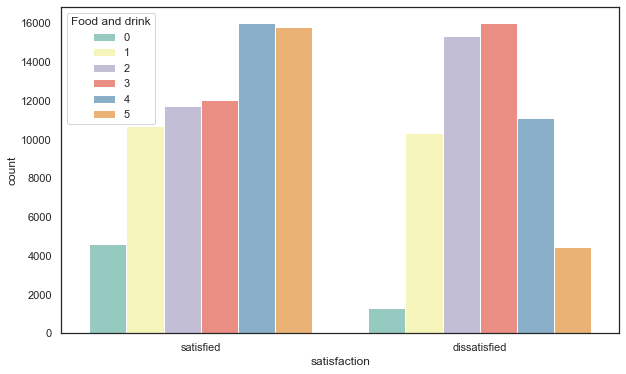

In [32]:
sns.set(style='white')
plt.figure(figsize=(10,6))
sns.countplot(x='satisfaction',data= df1,
              hue= 'Food and drink',palette="Set3")
plt.show()

<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='satisfaction'>

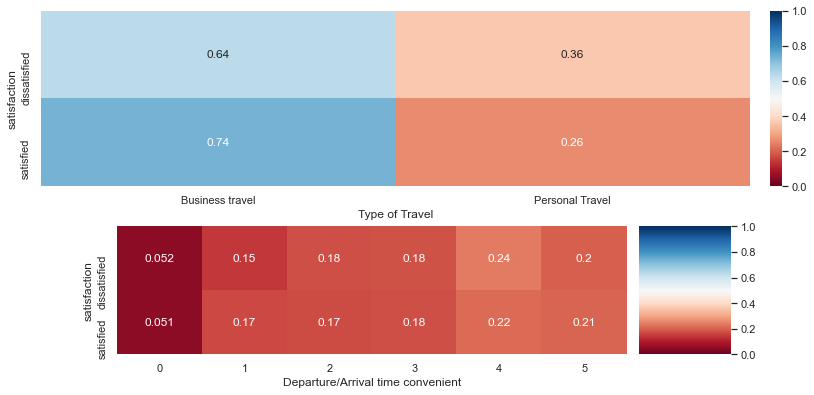

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [36]:
import matplotlib.gridspec as gridspec
fig= plt.figure(figsize = (11,8),constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
plt.figure(figsize = (10, 5))
f1_ax1 = fig.add_subplot(spec[0,:])
cross = pd.crosstab(df1['satisfaction'], df1['Type of Travel']).apply(lambda r: r/r.sum(), axis=1)
plt.figure(figsize = (10, 5))
sns.heatmap(cross,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1,
           ax = f1_ax1)
f2_ax2 = fig.add_subplot(spec[1,:])
cross1 = pd.crosstab(df1['satisfaction'], df1['Departure/Arrival time convenient']).apply(lambda r: r/r.sum(), axis=1)
plt.figure(figsize = (10, 5))
sns.heatmap(cross1,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1,
           ax = f2_ax2)
            

<AxesSubplot:xlabel='Inflight entertainment', ylabel='satisfaction'>

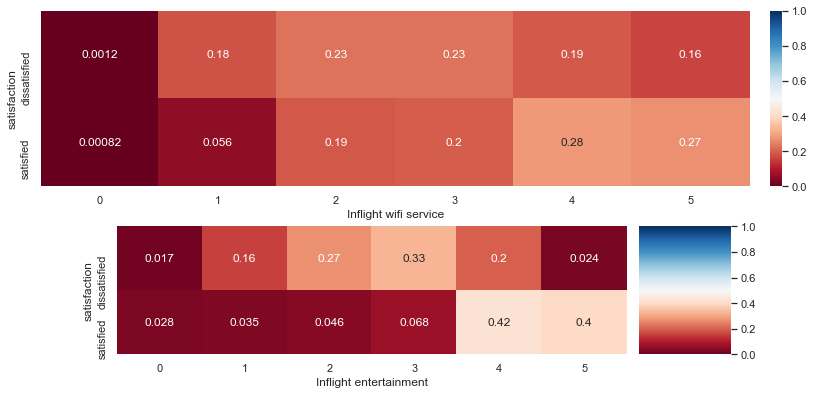

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [37]:
import matplotlib.gridspec as gridspec

fig= plt.figure(figsize = (11,8),constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
plt.figure(figsize = (10, 5))
f1_ax1 = fig.add_subplot(spec[0,:])
cross = pd.crosstab(df1['satisfaction'], df1['Inflight wifi service']).apply(lambda r: r/r.sum(), axis=1)
plt.figure(figsize = (10, 5))
sns.heatmap(cross,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1,
           ax = f1_ax1)
f2_ax2 = fig.add_subplot(spec[1,:])
cross1 = pd.crosstab(df1['satisfaction'], df1['Inflight entertainment']).apply(lambda r: r/r.sum(), axis=1)
plt.figure(figsize = (10, 5))
sns.heatmap(cross1,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1,
           ax = f2_ax2)
            

<AxesSubplot:xlabel='Ease of Online booking', ylabel='satisfaction'>

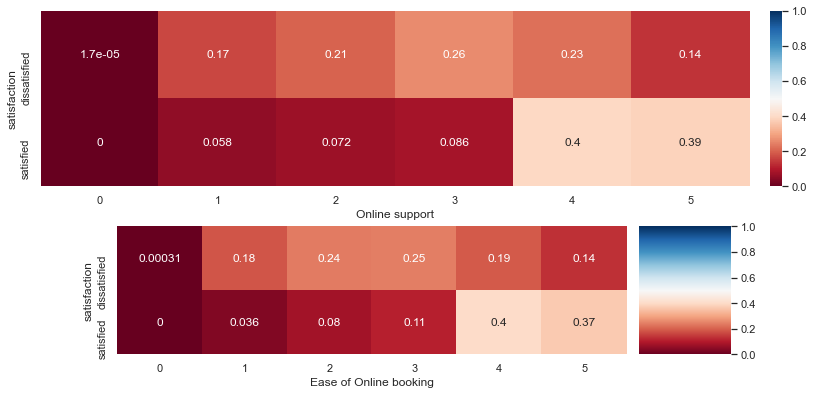

<Figure size 720x360 with 0 Axes>

In [38]:
import matplotlib.gridspec as gridspec

fig= plt.figure(figsize = (11,8),constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
plt.figure(figsize = (10, 5))
f1_ax1 = fig.add_subplot(spec[0,:])
cross = pd.crosstab(df1['satisfaction'], df1['Online support']).apply(lambda r: r/r.sum(), axis=1)
sns.heatmap(cross,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1,
           ax = f1_ax1)
f2_ax2 = fig.add_subplot(spec[1,:])
cross1 = pd.crosstab(df1['satisfaction'], df1['Ease of Online booking']).apply(lambda r: r/r.sum(), axis=1)
sns.heatmap(cross1,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1,
           ax = f2_ax2)
            

<AxesSubplot:xlabel='Ease of Online booking', ylabel='Online support'>

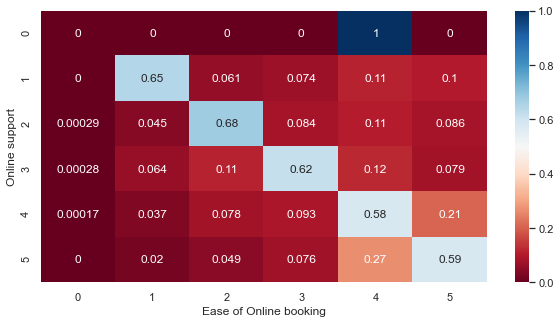

In [39]:
cross = pd.crosstab(df1['Online support'], df1['Ease of Online booking']).apply(lambda r: r/r.sum(), axis=1)

plt.figure(figsize = (10, 5))
sns.heatmap(cross,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1)

<AxesSubplot:xlabel='Inflight wifi service', ylabel='Online support'>

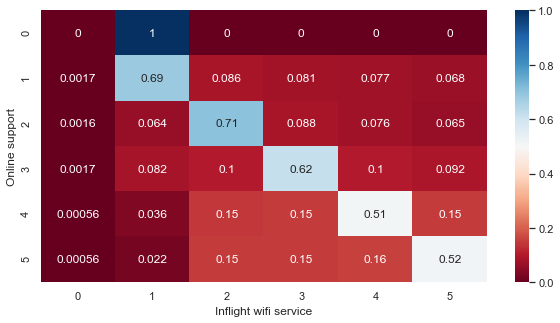

In [40]:
cross = pd.crosstab(df1['Online support'], df1['Inflight wifi service']).apply(lambda r: r/r.sum(), axis=1)

plt.figure(figsize = (10, 5))
sns.heatmap(cross,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1)

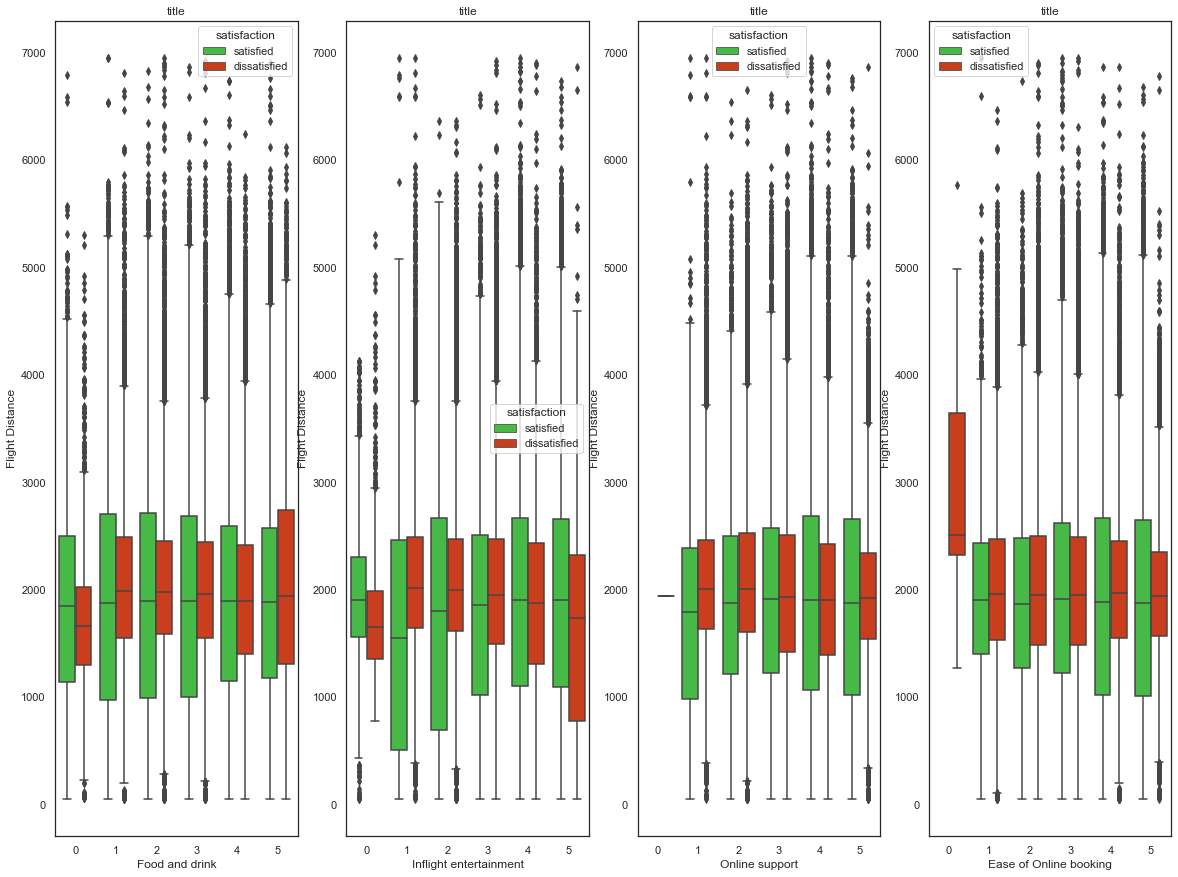

In [41]:
f, axes = plt.subplots(ncols=4, figsize=(20,15))
colors = ["#33cc33", "#e62e00"]

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Food and drink", y="Flight Distance", data=df1, hue= 'satisfaction',palette=colors, ax=axes[0])
axes[0].set_title('title')

sns.boxplot(x="Inflight entertainment", y="Flight Distance", hue= 'satisfaction',data=df1, palette=colors, ax=axes[1])
axes[1].set_title('title')


sns.boxplot(x="Online support", y="Flight Distance",hue= 'satisfaction', data=df1, palette=colors, ax=axes[2])
axes[2].set_title('title')


sns.boxplot(x="Ease of Online booking", y="Flight Distance", hue= 'satisfaction',data=df1, palette=colors, ax=axes[3])
axes[3].set_title('title')

plt.show()

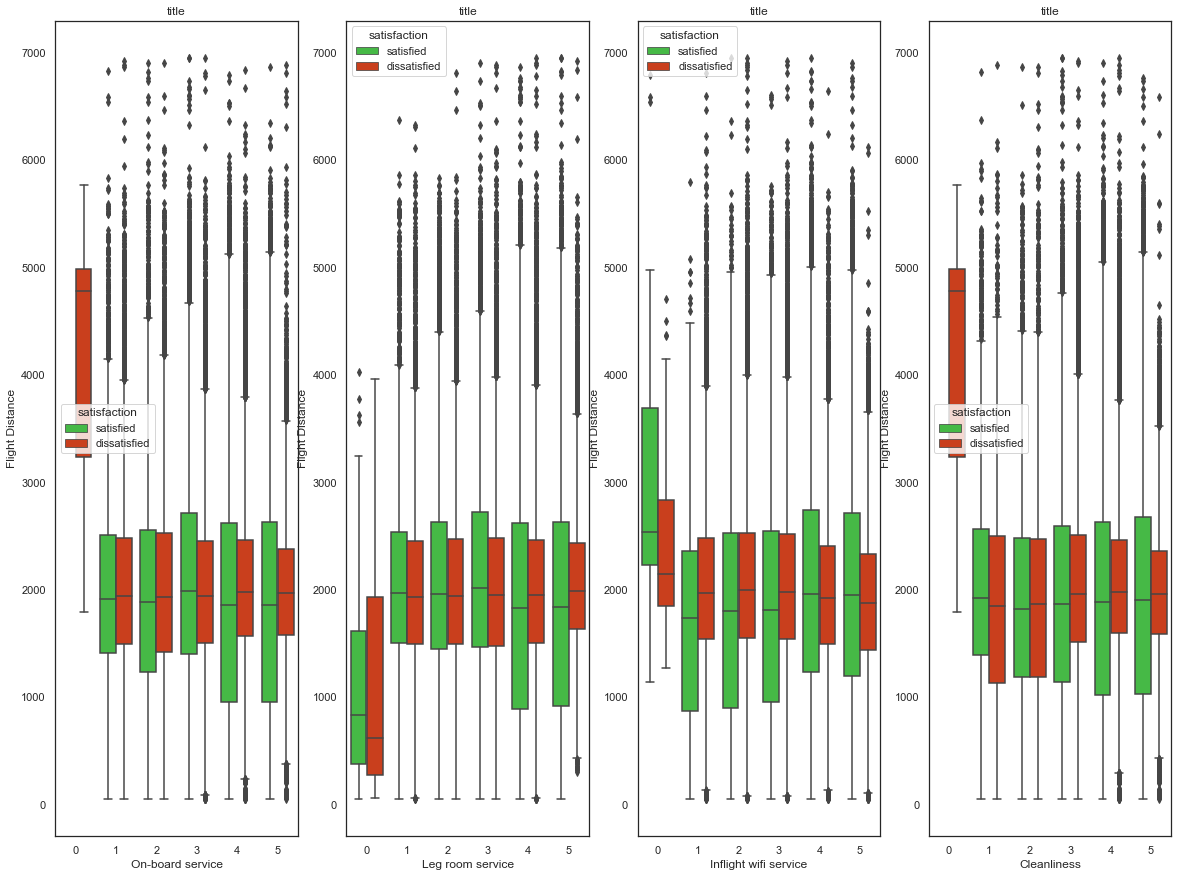

In [42]:
f, axes = plt.subplots(ncols=4, figsize=(20,15))
colors = ["#33cc33", "#e62e00"]

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="On-board service", y="Flight Distance", hue= 'satisfaction',data=df1,palette=colors, ax=axes[0])
axes[0].set_title('title')

sns.boxplot(x="Leg room service", y="Flight Distance", hue= 'satisfaction',data=df1, palette=colors, ax=axes[1])
axes[1].set_title('title')


sns.boxplot(x="Inflight wifi service", y="Flight Distance", hue= 'satisfaction',data=df1, palette=colors, ax=axes[2])
axes[2].set_title('title')


sns.boxplot(x="Cleanliness", y="Flight Distance",hue= 'satisfaction',data=df1, palette=colors, ax=axes[3])
axes[3].set_title('title')

plt.show()



### Function for plotting variables distribution

In [43]:
from scipy.stats import norm
def countplot(data, var1, var2, var3):
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

    sns.countplot(data[var1], color='#FB8861', ax = ax1)
    ax1.set_title('title', fontsize=14)

    sns.countplot(data[var2],ax=ax2, color='#56F9BB')
    ax2.set_title('title', fontsize=14)

    sns.countplot(data[var3],ax=ax3, color='#C5B3F9')
    ax3.set_title('title', fontsize=14)

    plt.show()

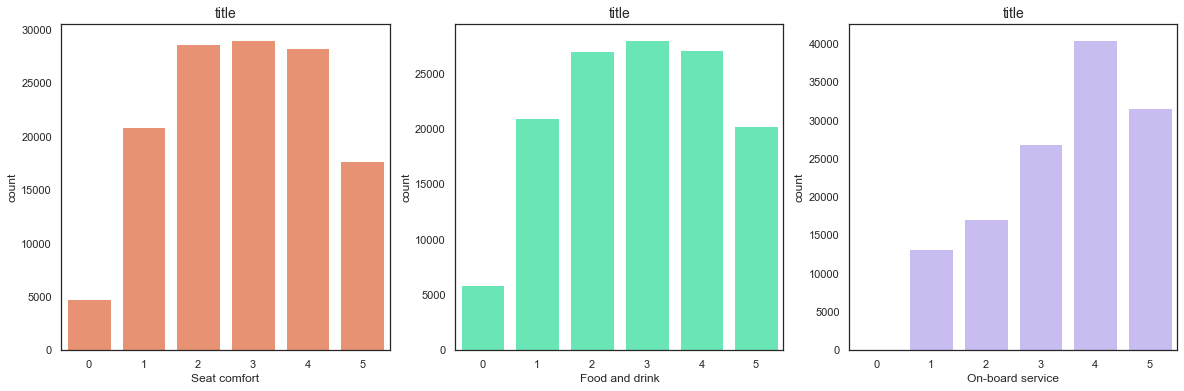

In [44]:
countplot(df1,'Seat comfort','Food and drink','On-board service')

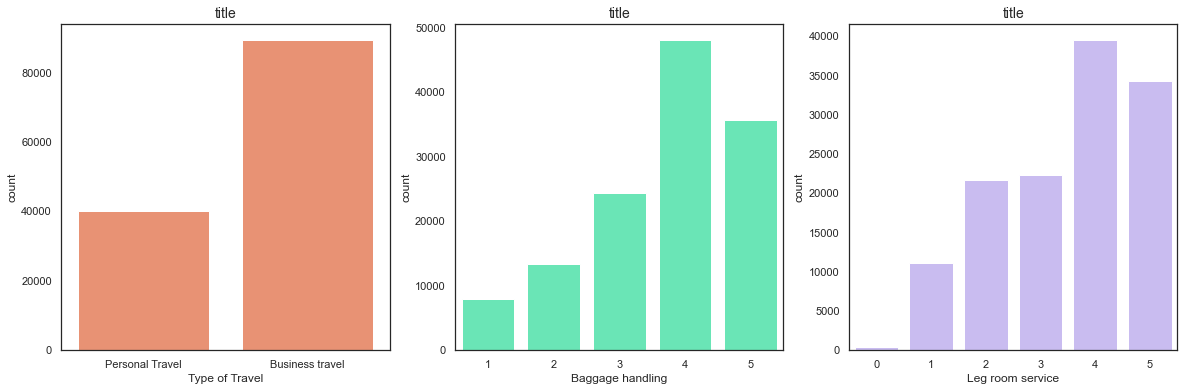

In [45]:
countplot(df1,'Type of Travel','Baggage handling','Leg room service')

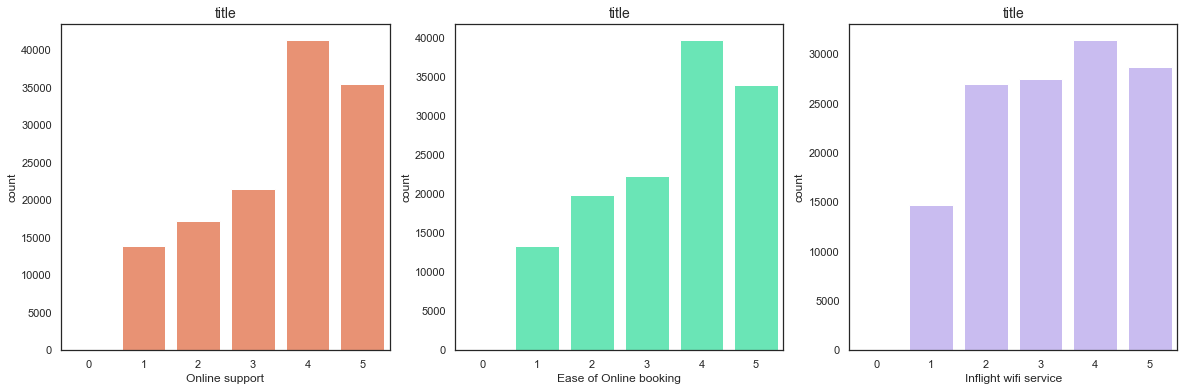

In [46]:
countplot(df1, 'Online support','Ease of Online booking','Inflight wifi service')

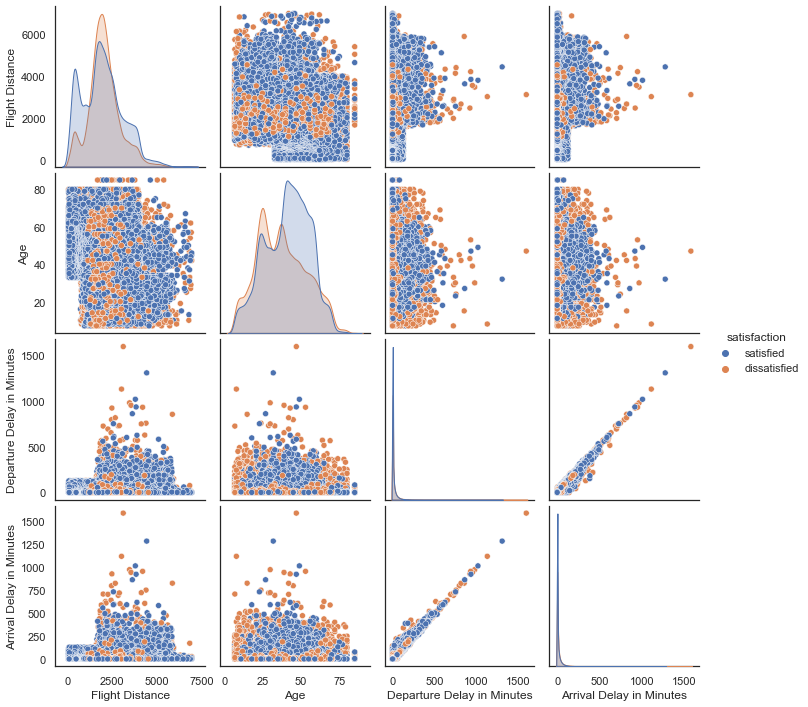

In [47]:
cols = ['Flight Distance', 'Age', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
sns.pairplot(df1, vars = cols, hue = 'satisfaction')

## Classification

#### Logistic regression 
#### KNN
#### Random Forest Classifier

In [48]:
df1 = df1.drop(['Arrival Delay in Minutes'],axis='columns')


In [49]:
columns = ['Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service','Inflight entertainment', 'Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding']
for column in columns:
    df1[column] = df1[column].astype('O')

In [50]:
df1.satisfaction.unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [51]:
df1['satisfaction'] = df1['satisfaction'].replace('satisfied','1').replace('dissatisfied', '0')

In [52]:
target = df1['satisfaction'].astype(int)
X = df1.drop(columns='satisfaction')
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,4,2,3,3,0,3,5,3,2,0
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,2,3,4,4,4,2,3,2,310
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,0,2,2,3,3,4,4,4,2,0
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,4,3,1,1,0,1,4,1,3,0
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,3,4,2,2,0,2,4,2,5,0


In [ ]:
X.info()

In [53]:
X = pd.get_dummies(X, columns=['Gender','Customer Type','Type of Travel','Class','Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service','Inflight entertainment', 'Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding','Departure Delay in Minutes'])
X.head()

,Age,Flight Distance,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,...,Departure Delay in Minutes_859,Departure Delay in Minutes_921,Departure Delay in Minutes_930,Departure Delay in Minutes_933,Departure Delay in Minutes_951,Departure Delay in Minutes_978,Departure Delay in Minutes_1017,Departure Delay in Minutes_1128,Departure Delay in Minutes_1305,Departure Delay in Minutes_1592
0,65,265,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,47,2464,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,15,2138,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,60,623,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,70,354,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
train_x,test_x,train_y,test_y = train_test_split(X,target,test_size=0.3,random_state=42)
print(f"Number of observations \n Train set: {len(train_x)}\n Test set: {len(test_x)}")

Number of observations 
 Train set: 90640
 Test set: 38847


Score :  0.7140577135943573
Basic KNN Acc :  0.7140577135943573


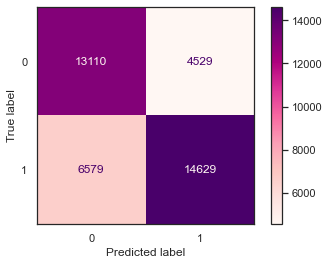

In [55]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)
cm = confusion_matrix(test_y, y_pred)

acc = accuracy_score(test_y, y_pred)
score = knn.score(test_x, test_y)

print("Score : ", score)
print("Basic KNN Acc : ", acc)

plot_confusion_matrix(knn,test_x, test_y, cmap= "RdPu")  
plt.show()

In [56]:
Logistic = LogisticRegression(random_state=42,solver='liblinear')
Knn = KNeighborsClassifier(n_neighbors=5)
RFC = RandomForestClassifier(n_estimators=100, random_state=42)

In [57]:
def results(cls_list):
    indx = [ 'Acc_train', 'Acc_test', 'Recall_test', 'Precision_test']
    
    results = pd.DataFrame(index=indx, columns=['Logistic', 'Knn', 'RFC'])
    
    for i, cls in enumerate(cls_list):
        cls.fit(train_x,train_y)
        test_y_new = cls.predict(test_x)    
        train_y_new = cls.predict(train_x)
        acc_train = accuracy_score(train_y,train_y_new)
        acc_test = accuracy_score(test_y,test_y_new)
        rec_test = recall_score(test_y,test_y_new)
        pr_test = precision_score(test_y,test_y_new)
        name = results.columns[i]
        results[name] = [acc_train, acc_test, rec_test, pr_test]
    return results

In [58]:
classifiers = [ Logistic, Knn, RFC]
res = results(classifiers)

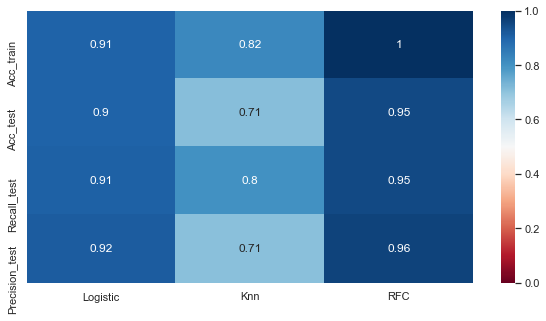

In [59]:
plt.figure(figsize = (10, 5))
s = sns.heatmap(res,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1)

### Classification after standartization

In [60]:
scaler = StandardScaler()
scaler.fit_transform(train_x) 

array([[ 1.16017568,  0.42682502,  0.983564  , ..., -0.00332156,
        -0.00332156,  0.        ],
       [ 0.76366504, -0.28017105, -1.01671065, ..., -0.00332156,
        -0.00332156,  0.        ],
       [ 0.49932461, -1.40843927,  0.983564  , ..., -0.00332156,
        -0.00332156,  0.        ],
       ...,
       [ 0.30106929,  0.38586801,  0.983564  , ..., -0.00332156,
        -0.00332156,  0.        ],
       [-1.81365416,  1.20988413,  0.983564  , ..., -0.00332156,
        -0.00332156,  0.        ],
       [-0.62412222,  0.30102848, -1.01671065, ..., -0.00332156,
        -0.00332156,  0.        ]])

In [61]:
test_x = scaler.transform(test_x) 

In [62]:
Logistic = LogisticRegression(random_state=42,solver='liblinear')
Knn = KNeighborsClassifier(n_neighbors=5)
RFC = RandomForestClassifier(n_estimators=100, random_state=42)

In [63]:
def results(cls_list):
    indx = [ 'Acc_train', 'Acc_test', 'Recall_test', 'Precision_test']
    
    results = pd.DataFrame(index=indx, columns=['Logistic', 'Knn', 'RFC'])
    
    for i, cls in enumerate(cls_list):
        cls.fit(train_x,train_y)
        test_y_new = cls.predict(test_x)    
        train_y_new = cls.predict(train_x)
        acc_train = accuracy_score(train_y,train_y_new)
        acc_test = accuracy_score(test_y,test_y_new)
        rec_test = recall_score(test_y,test_y_new)
        pr_test = precision_score(test_y,test_y_new)
        name = results.columns[i]
        results[name] = [acc_train, acc_test, rec_test, pr_test]
    return results

In [64]:
classifiers = [ Logistic, Knn, RFC]
res = results(classifiers)

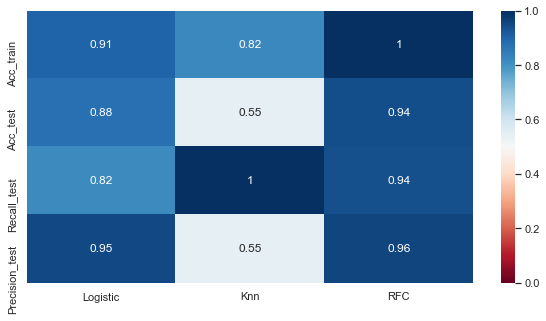

In [65]:
plt.figure(figsize = (10, 5))
s = sns.heatmap(res,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1)

## Clustering -Kmeans

In [94]:
satisfaction = df1['satisfaction']


In [99]:
df1.dropna(inplace = True)

In [95]:
df1 = df1.drop(['satisfaction'],axis='columns')

In [100]:
df1 = pd.get_dummies(df1, columns=['Gender','Customer Type','Type of Travel','Class','Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service','Inflight entertainment', 'Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding','Departure Delay in Minutes'])


KeyError: "None of [Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort',\n       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',\n       'Inflight wifi service', 'Inflight entertainment', 'Online support',\n       'Ease of Online booking', 'On-board service', 'Leg room service',\n       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',\n       'Departure Delay in Minutes'],\n      dtype='object')] are in the [columns]"

In [101]:
scaler = StandardScaler()
data_stand = scaler.fit_transform(df1)

In [ ]:

hier_clust = linkage(df1, method = 'ward')


In [102]:
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 15 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(df1)
    inertia.append(algorithm.inertia_)

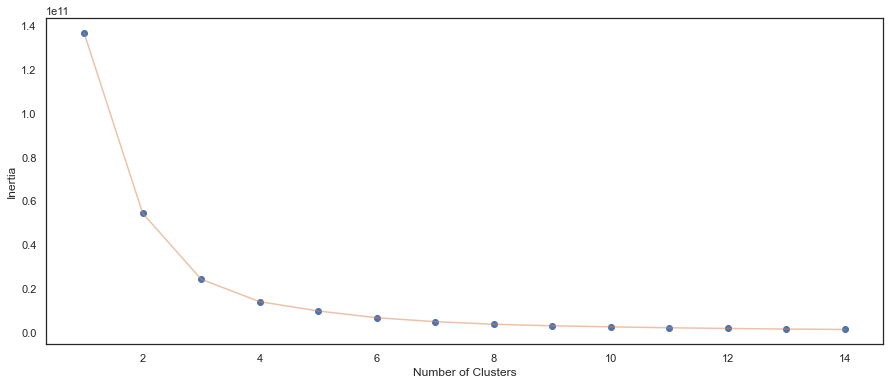

In [103]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [104]:
kmeans = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
kmeans.fit(df1)
#labels1 = algorithm.labels_
#centroids1 = algorithm.cluster_centers_

KMeans(algorithm='elkan', n_clusters=3, random_state=111)

In [105]:
df1['Clusters'] = kmeans.labels_

In [106]:
df1 = df1.join(satisfaction)

In [107]:
df1.head()

,Age,Flight Distance,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,...,Departure Delay in Minutes_930,Departure Delay in Minutes_933,Departure Delay in Minutes_951,Departure Delay in Minutes_978,Departure Delay in Minutes_1017,Departure Delay in Minutes_1128,Departure Delay in Minutes_1305,Departure Delay in Minutes_1592,Clusters,satisfaction
0,65,265,0.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,satisfied
1,47,2464,305.0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,2,satisfied
2,15,2138,0.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,2,satisfied
3,60,623,0.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,satisfied
4,70,354,0.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,satisfied


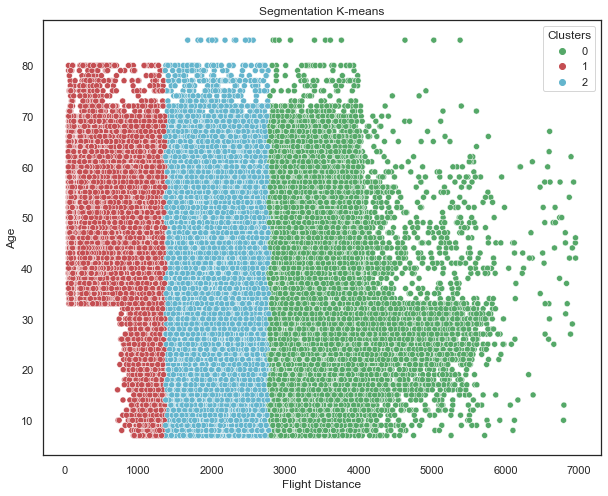

In [108]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = df1['Flight Distance'], y= df1['Age'], hue = df1['Clusters'], palette = ['g', 'r', 'c'])
plt.title('Segmentation K-means')
plt.show()

In [110]:
df1 = df1.drop(['satisfaction'],axis='columns')

In [111]:
kmeans2 = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
kmeans2.fit(df1)
#labels1 = algorithm.labels_
#centroids1 = algorithm.cluster_centers_

KMeans(algorithm='elkan', n_clusters=2, random_state=111)

In [112]:
df1['Clusters2'] = kmeans2.labels_

In [115]:
df1 = df1.join(satisfaction)

ValueError: columns overlap but no suffix specified: Index(['satisfaction'], dtype='object')

In [117]:
df1.head(15)

,Age,Flight Distance,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,...,Departure Delay in Minutes_933,Departure Delay in Minutes_951,Departure Delay in Minutes_978,Departure Delay in Minutes_1017,Departure Delay in Minutes_1128,Departure Delay in Minutes_1305,Departure Delay in Minutes_1592,Clusters,Clusters2,satisfaction
0,65,265,0.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,satisfied
1,47,2464,305.0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,2,0,satisfied
2,15,2138,0.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,2,1,satisfied
3,60,623,0.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,satisfied
4,70,354,0.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,satisfied
5,30,1894,0.0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,2,1,satisfied
6,66,227,15.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,satisfied
7,10,1812,0.0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,2,1,satisfied
8,56,73,0.0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,1,satisfied
9,22,1556,26.0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,2,1,satisfied


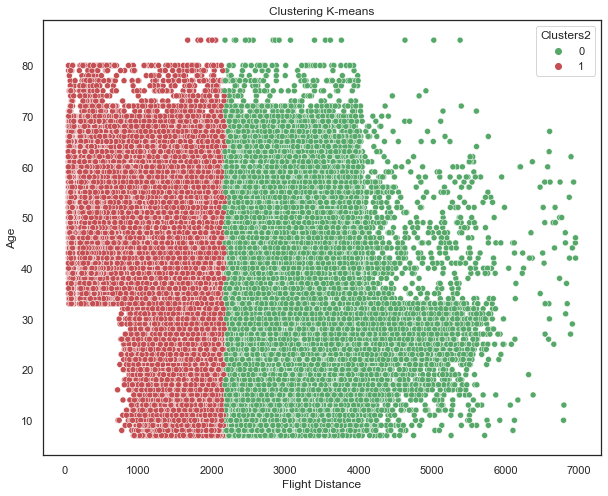

In [118]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = df1['Flight Distance'], y= df1['Age'], hue = df1['Clusters2'], palette = ['g', 'r'])
plt.title('Clustering K-means')
plt.show()

##                                                         THANK YOU